In [3]:
import pandas as pd 
import joblib
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import import_ipynb
import DataSetManipulation
import ParseTxtToCsv
import ModelToolkit

In [4]:
#Training data building, testing and graphing

In [5]:
pathList = [
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 1].txt',
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 2].txt',
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 3].txt',
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 4].txt', 
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 5].txt', 
    'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 6].txt'
]
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 2].txt',
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 3].txt'
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 4].txt', 
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 5].txt', 
    #'v1/content/drive/Shareddrives/Datasets/cleaned-v4/discord-v1-detox-antispam/[136542963336478720] [part 6].txt'

subPathList = []
resultList = []


In [6]:
#builds a model for each set of paths
for i, path in enumerate(pathList): 
    subPathList.append(path)
    #Saves it as a csv file named TrainingData.csv
    ModelToolkit.DatasetBuilder(subPathList, f"Dataset{i}.csv")
    TrainingDataPath = f"Dataset{i}.csv"
    
    #creates the message to vector dictionary nessesary for cosine comparison
    df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(TrainingDataPath)
    #builds the final features that the model will have for training
    df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)

    #tests 
    results, model = ModelToolkit.TrainTest(df)
    #saves the model
    joblib.dump(model, f"trainedmodel{i}.pkl")
    #saves the results for graphing
    resultList.append(results)
    

Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 133/133 [02:39<00:00,  1.20s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 227/227 [05:36<00:00,  1.48s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 265/265 [07:26<00:00,  1.69s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 345/345 [11:51<00:00,  2.06s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 450/450 [20:53<00:00,  2.79s/it]


Final dataset done.
Raw text parsing done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████| 519/519 [30:10<00:00,  3.49s/it]


Final dataset done.


[[[  0.6875       0.71111111   0.77777778   0.79487179   0.84444444
     0.81818182]
  [  0.81481481   0.69565217   0.79245283   0.89855072   0.84444444
     0.86538462]
  [  0.74576271   0.7032967    0.78504673   0.84353741   0.84444444
     0.8411215 ]
  [  0.77272727   0.69565217   0.78846154   0.88333333   0.84444444
     0.85714286]
  [  0.62962963   0.71111111   0.77358491   0.76811594   0.84444444
     0.80769231]
  [  0.69387755   0.7032967    0.78095238   0.82170543   0.84444444
     0.83168317]
  [  0.72222222   0.7032967    0.78301887   0.83333333   0.84444444
     0.83653846]
  [ 27.          46.          53.          69.          90.
   104.        ]
  [ 27.          45.          53.          69.          90.
   104.        ]]]


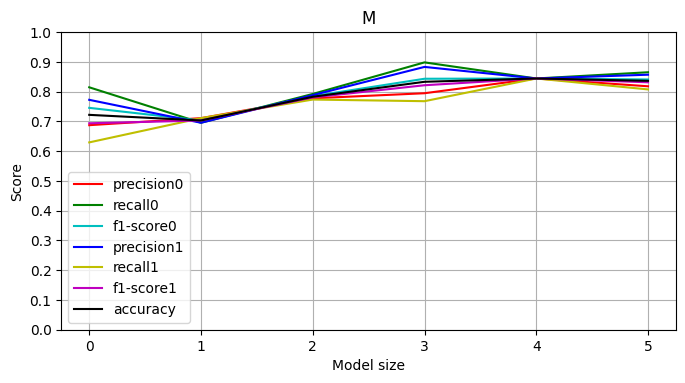

In [7]:
#graphs given results
f1ResultMatrix = ModelToolkit.MatrixBuilder(resultList, pathList)
print(f1ResultMatrix)
plt = ModelToolkit.F1GraphBuilder(f1ResultMatrix, len(resultList), 'MainTest')

In [8]:
#implementation data building, testing and graphing

In [9]:
chatList = [
    'RealChatLogs.csv',
    'RealChatLogsGaymers.csv'
]

modelList = [
    'trainedmodel0.pkl',
    'trainedmodel1.pkl',
    'trainedmodel2.pkl',
    'trainedmodel3.pkl',
    'trainedmodel4.pkl',
    'trainedmodel5.pkl'
]

dfTestList = []

In [10]:
#builds the implementation test cases

for chat in chatList:
    cleanFile = 'ImplementationLogs.csv'
    finalFile = 'ImplementationTestLogs.csv'

    minMessages = 100
    maxMessages = 10000
    messagesPerColumn = 30

    #Edits extracted logs csv file to be compatible with existing program
    df = pd.read_csv(chat)

    df = df[['Username', 'Content']]
    df.rename(columns={
         'Username': 'User',
         'Content': 'Message'
     }, inplace = True)

    df.to_csv('ImplementationLogs.csv', index = False)

    print("Edits to fit the correct format done.")

    #Filters messages so that amount of variables changing when going for implementation stay low.
    data, keepList = DataSetManipulation.MinMaxFilter(cleanFile, minMessages, maxMessages)
    print('Filtering by min and max messages done.')

    #writes the final csv file that can be used to test the current model.
    DataSetManipulation.PairData(data, keepList, finalFile, messagesPerColumn)
    print('Final dataset done.')


    #creates the message to vector dictionary nessesary for cosine comparison
    df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(finalFile)

    #Builds features for testing
    df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)


    #appends the df for testing and graphing
    dfTestList.append(df) 


Edits to fit the correct format done.
Filtering by min and max messages done.


Processing users: 100%|██████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 33.77it/s]


Final dataset done.
Edits to fit the correct format done.
Filtering by min and max messages done.


Processing users: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 111.04it/s]

Final dataset done.


In [11]:
#Builds matrises
f1ResultMatrix, confusionMatrix = ModelToolkit.ImplementationResult(dfTestList, modelList)
print(f1ResultMatrix) 
print(confusionMatrix)

[[[0.77777778 0.75       1.         0.83333333 0.85714286 1.        ]
  [1.         0.85714286 0.85714286 0.71428571 0.85714286 0.57142857]
  [0.875      0.8        0.92307692 0.76923077 0.85714286 0.72727273]
  [1.         0.83333333 0.875      0.75       0.85714286 0.7       ]
  [0.71428571 0.71428571 1.         0.85714286 0.85714286 1.        ]
  [0.83333333 0.76923077 0.93333333 0.8        0.85714286 0.82352941]
  [0.85714286 0.78571429 0.92857143 0.78571429 0.85714286 0.78571429]
  [7.         7.         7.         7.         7.         7.        ]
  [7.         7.         7.         7.         7.         7.        ]]

 [[0.8        1.         1.         0.66666667 1.         1.        ]
  [1.         1.         1.         1.         0.75       1.        ]
  [0.88888889 1.         1.         0.8        0.85714286 1.        ]
  [1.         1.         1.         1.         0.8        1.        ]
  [0.75       1.         1.         0.5        1.         1.        ]
  [0.85714286 1.  

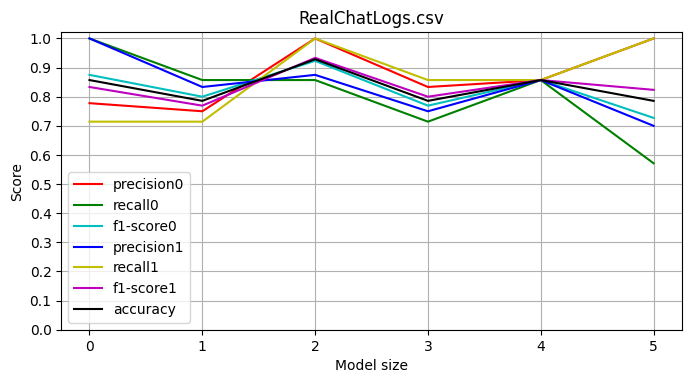

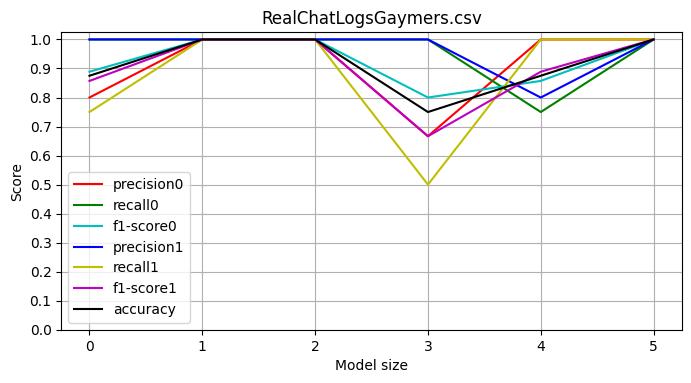

In [12]:
#graphs out results
plt = ModelToolkit.F1GraphBuilder(f1ResultMatrix, len(modelList), chatList)

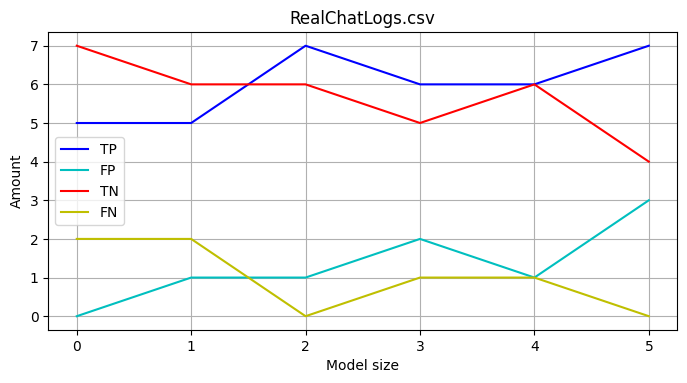

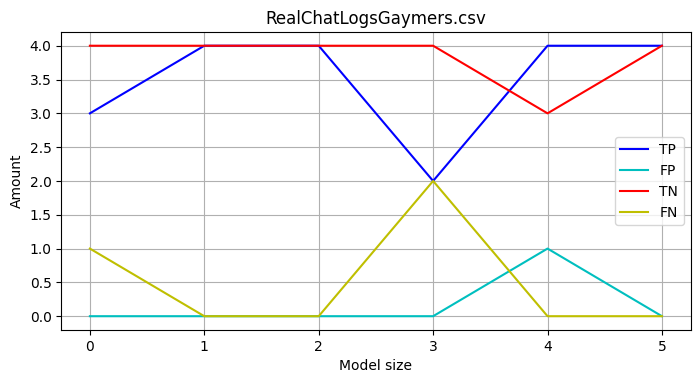

In [13]:
#graphs out confusion matrix 
plt = ModelToolkit.ConfusionMatrixGraphBuilder(confusionMatrix, len(modelList), chatList)

In [ ]:
#For running single test for implementation

cleanFile = 'ImplementationLogs.csv'
finalFile = 'ImplementationTestLogs.csv'

minMessages = 100
maxMessages = 10000
messagesPerColumn = 30

#Edits extracted logs csv file to be compatible with existing program
df = pd.read_csv('RealChatLogsGaymers.csv')

df = df[['Username', 'Content']]
df.rename(columns={
     'Username': 'User',
     'Content': 'Message'
 }, inplace = True)

df.to_csv('ImplementationLogs.csv', index = False)

print("Edits to fit the correct format done.")

#Filters messages so that amount of variables changing when going for implementation stay low.
data, keepList = DataSetManipulation.MinMaxFilter(cleanFile, minMessages, maxMessages)
print('Filtering by min and max messages done.')

#writes the final csv file that can be used to test the current model.
DataSetManipulation.PairData(data, keepList, finalFile, messagesPerColumn)
print('Final dataset done.')


#creates the message to vector dictionary nessesary for cosine comparison
df, messageToVectorDictionary = ModelToolkit.MessageToVectorDictionaryBuilder(finalFile)

#Builds features for testing
df = ModelToolkit.FeatureBuilder(df, messageToVectorDictionary)


#loads the model and runs the tests on the prediction 
model = joblib.load('RandomForestModel1to6.pkl')

X = df.drop(columns=[
    'Message1',
    'Message2', 
    'FromSameUserNum',
    'FromSameUser'
])
true = df["FromSameUserNum"]

# Make predictions
prediction = model.predict(X)

print(classification_report(true, prediction))

print("Confusion Matrix:")
print(confusion_matrix(true, prediction))